# Analysis for second set of offline experiments

In [1]:
from glob import glob
import xroms
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import cartopy      
cartopy.config['pre_existing_data_dir'] = '$SCRATCH/cartopy_data'
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LogNorm

proj = cartopy.crs.LambertConformal(central_longitude=-90)
pc = cartopy.crs.PlateCarree()

fsbig = 14
fsmed = 12

# Read in

In [2]:
fileon100 = '/scratch/group/csomio/CSOMIO/oil_03/output/oil_03_exp_100_ocean_his.nc'
dson = xroms.open_netcdf(fileon100, xrargs={'decode_times': False}, chunks='auto')
dson['ocean_time'] = (dson.ocean_time - dson.ocean_time[0])/86400

In [3]:
fileoff100 = '/scratch/group/csomio/CSOMIO/oil_off/output/exp_100_ocean_his.nc'
dsoff100 = xroms.open_netcdf(fileoff100, xrargs={'decode_times': False}, Vtransform=2, chunks='auto')
dsoff100['ocean_time'] = (dsoff100.ocean_time - dsoff100.ocean_time[0])/86400

fileoff1000 = '/scratch/group/csomio/CSOMIO/oil_off/output/exp_1000_ocean_his.nc'
dsoff1000 = xroms.open_netcdf(fileoff1000, xrargs={'decode_times': False}, Vtransform=2, chunks='auto')
dsoff1000['ocean_time'] = (dsoff1000.ocean_time - dsoff1000.ocean_time[0])/86400

# Plots

## Snapshots

In [4]:
# calculate z slices of dye for all simulations
zs = [-600, -700, -800, -900, -1000]
dyezon = dson.dye_01.xroms.isoslice(zs, iso_array=dson.dye_01.z_rho, axis='Z')
dyezoff100 = dsoff100.dye_01.xroms.isoslice(zs, iso_array=dsoff100.dye_01.z_rho, axis='Z')
dyezoff1000 = dsoff1000.dye_01.xroms.isoslice(zs, iso_array=dsoff1000.dye_01.z_rho, axis='Z')

### Initial conditions

In [5]:
def setmap(ax, xlocs=np.arange(-93,-84,2), ylocs=None, bottom_labels=True, left_labels=True):
    ax.add_feature(cartopy.feature.LAND.with_scale('10m'), facecolor='0.7', zorder=10)
    ax.set_extent(extent, pc)
    gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, xlocs=xlocs, ylocs=ylocs)
    gl.xlabel_style = {'size': fsmed}
    gl.ylabel_style = {'size': fsmed}
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = left_labels
    gl.bottom_labels = bottom_labels
    return ax

/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


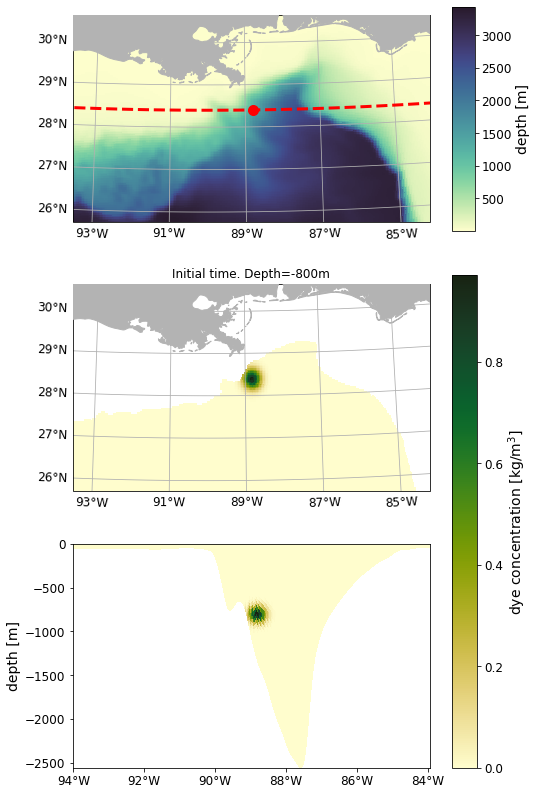

In [18]:
extent = [-93.5,-84.25,25.7,30.5]


fig = plt.figure(figsize=(8,14))


ax = setmap(fig.add_subplot(3, 1, 1, projection=proj))
mappable = dson.h.cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.deep, transform=pc, add_colorbar=False)
cb = fig.colorbar(mappable, label='depth [m]', aspect=10)
cb.set_label('depth [m]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)
ax.plot(dson.lon_rho[70,:], dson.lat_rho[70,:], 'r', ls='--', lw=3, transform=pc)
ax.plot(dson.lon_rho[70,130], dson.lat_rho[70,130], 'ro', transform=pc, ms=10)

ax1 = setmap(fig.add_subplot(3, 1, 2, projection=proj))
ax = ax1
dyezon.cf.isel(Z=2, T=0).cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False)
plt.title('Initial time. Depth=-800m')


ax2 = fig.add_subplot(3, 1, 3)
ax = ax2
im = dson.dye_01.cf.isel(Y=70, T=0).cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed, 
                                            add_colorbar=False, add_labels=False)
formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(formatter)
cb = fig.colorbar(im, ax=[ax1,ax2])
cb.set_label('dye concentration [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)
ax.set_ylabel('depth [m]', size=fsbig)
ax.tick_params(axis='both', which='both', labelsize=fsmed)

fig.savefig('figures/exp_map_high.png', bbox_inches='tight', dpi=300)
fig.savefig('figures/exp_map_low.png', bbox_inches='tight', dpi=100)

### Subset the domain for the rest of the plots and analysis

In [6]:
dsson = dson.xroms.subset(Y=slice(38,97), X=slice(100,175)).chunk({'ocean_time': 200})
dssoff100 = dsoff100.xroms.subset(Y=slice(38,97), X=slice(100,175)).chunk({'ocean_time': 200})
dssoff1000 = dsoff1000.xroms.subset(Y=slice(38,97), X=slice(100,175)).chunk({'ocean_time': 200})

In [7]:
# calculate z slices of dye for all simulations
zs = [-600, -700, -800, -900, -1000]
dyezon = dsson.dye_01.xroms.isoslice(zs, iso_array=dsson.dye_01.z_rho, axis='Z')
dyezoff100 = dssoff100.dye_01.xroms.isoslice(zs, iso_array=dssoff100.dye_01.z_rho, axis='Z')
dyezoff1000 = dssoff1000.dye_01.xroms.isoslice(zs, iso_array=dssoff1000.dye_01.z_rho, axis='Z')

### zslice, 13.75 days

/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning:

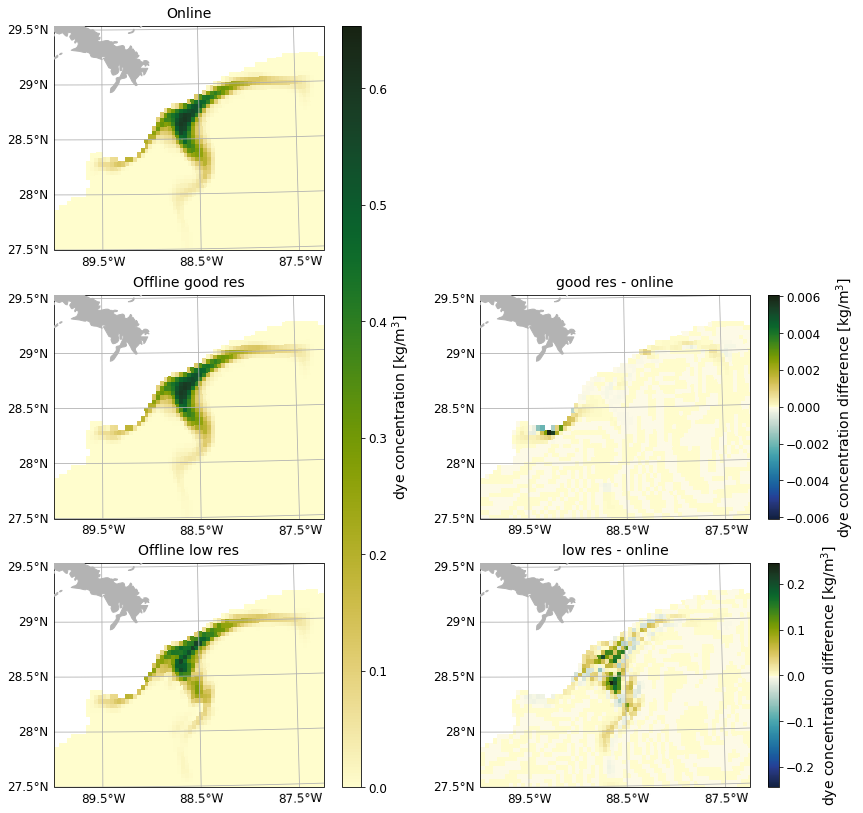

In [9]:
don = dyezon.cf.isel(Z=2).cf.sel(time=13.75)
doff100 = dyezoff100.cf.isel(Z=2).cf.sel(time=13.75)
doff1000 = dyezoff1000.cf.isel(Z=2).cf.sel(time=13.75)
diff1 = (don-doff100)
diff2 = (don-doff1000)
diffmax = max(abs(diff1).max().values, abs(diff2).max().values)
dyemax = dson.dye_01.cf.sel(time=13.75).max().values

extent = [-90,-87.25,27.5,29.5]
xlocs = np.arange(-90.5,-86.5)
ylocs = np.arange(26,30, 0.5)

fig = plt.figure(figsize=(14,14))

## DYE AT 13.75 DAYS ##
ax1 = setmap(fig.add_subplot(3, 2, 1, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = dyezon.cf.isel(Z=2).cf.sel(time=13.75).cf.plot(y='latitude', x='longitude', ax=ax1, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False, vmin=0, vmax=dyemax)
plt.title('Online', fontsize=fsbig)


ax2 = setmap(fig.add_subplot(3, 2, 3, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = dyezoff100.cf.isel(Z=2).cf.sel(time=13.75).cf.plot(y='latitude', x='longitude', ax=ax2, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False, vmin=0, vmax=dyemax)
plt.title('Offline good res', fontsize=fsbig)


ax3 = setmap(fig.add_subplot(3, 2, 5, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = dyezoff1000.cf.isel(Z=2).cf.sel(time=13.75).cf.plot(y='latitude', x='longitude', ax=ax3, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False, vmin=0, vmax=dyemax)
plt.title('Offline low res', fontsize=fsbig)
cb = fig.colorbar(im, ax=[ax1,ax2,ax3], aspect=40)
cb.set_label('dye concentration [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


## DIFFERENCE IN DYE AT 13.75 DAYS ##

ax4 = setmap(fig.add_subplot(3, 2, 4, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = diff1.cf.plot(y='latitude', x='longitude', ax=ax4, cmap=cmo.delta, transform=pc, 
                                 add_colorbar=False)
plt.title('good res - online', fontsize=fsbig)
cb = fig.colorbar(im, ax=ax4)#, aspect=30)
cb.set_label('dye concentration difference [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


ax6 = setmap(fig.add_subplot(3, 2, 6, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = diff2.cf.plot(y='latitude', x='longitude', ax=ax6, cmap=cmo.delta, transform=pc, 
                                 add_colorbar=False)
plt.title('low res - online', fontsize=fsbig)
cb = fig.colorbar(im, ax=ax6)#, aspect=30)
cb.set_label('dye concentration difference [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


### Vertical cross section, 13.75 days

In [8]:
# Y index in subdomain

# Y=slice(38,97)
iY = 40  # 78


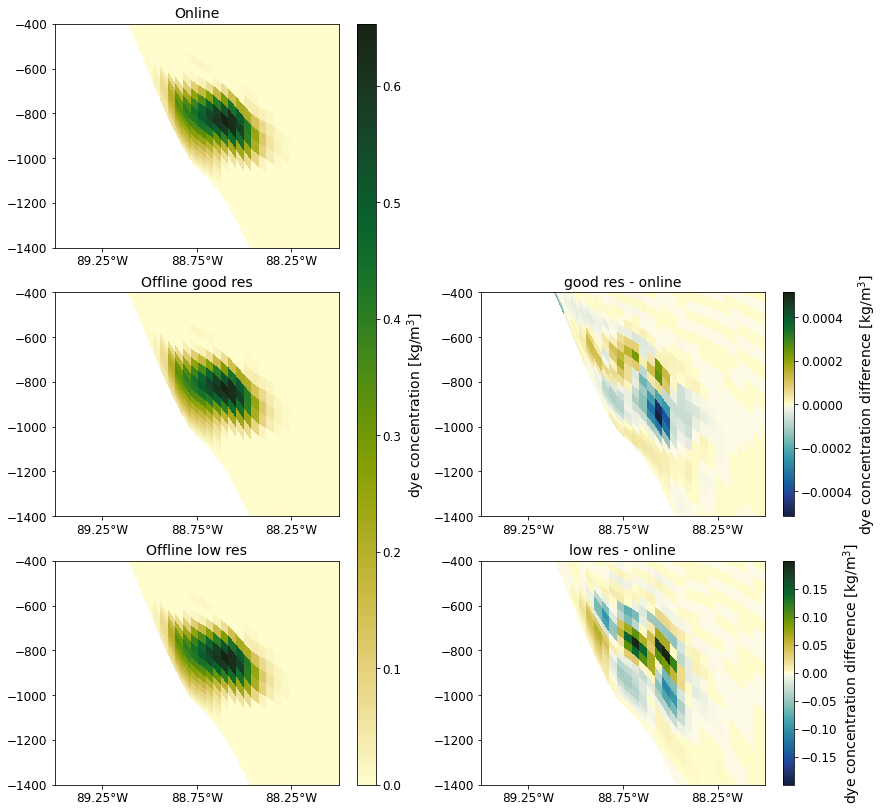

In [11]:

# don = dsson.dye_01.cf.isel(Y=iY).cf.sel(time=13.75)
# doff100 = dssoff100.dye_01.cf.isel(Y=iY).cf.sel(time=13.75)
# doff1000 = dssoff1000.dye_01.cf.isel(Y=iY).cf.sel(time=13.75)
# diff1 = (don-doff100)
# diff2 = (don-doff1000)
# vmax = max(abs(diff1).max().values, abs(diff2).max().values)

xlims = [-89.5,-88]
ylims = [-1400,-400]
xlocs = np.arange(-90.25,-87,0.5)

fig = plt.figure(figsize=(14,14))

## DYE AT 13.75 DAYS ##
ax1 = fig.add_subplot(3, 2, 1)
ax = ax1
im = dsson.dye_01.cf.isel(Y=iY).cf.sel(time=13.75).cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed,
                                                         add_colorbar=False, vmin=0, vmax=dyemax, add_labels=False)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('Online', fontsize=fsbig)
formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)


ax3 = fig.add_subplot(3, 2, 3)
ax = ax3
im = dsson.dye_01.cf.isel(Y=iY).cf.sel(time=13.75).cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed,
                                                         add_colorbar=False, vmin=0, vmax=dyemax, add_labels=False)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('Offline good res', fontsize=fsbig)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)


ax5 = fig.add_subplot(3, 2, 5)
ax = ax5
im = dsson.dye_01.cf.isel(Y=iY).cf.sel(time=13.75).cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed,
                                                         add_colorbar=False, vmin=0, vmax=dyemax, add_labels=False)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('Offline low res', fontsize=fsbig)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
cb = fig.colorbar(im, ax=[ax1,ax3,ax5], aspect=40)
cb.set_label('dye concentration [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


## DIFFERENCE IN DYE AT 13.75 DAYS ##

ax4 = fig.add_subplot(3, 2, 4)
ax = ax4
im = diff1.cf.plot(y='z_rho0', x='longitude', ax=ax4, cmap=cmo.delta, 
                                 add_colorbar=False, add_labels=False)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('good res - online', fontsize=fsbig)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
cb = fig.colorbar(im, ax=ax4)#, aspect=30)
cb.set_label('dye concentration difference [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


ax6 = fig.add_subplot(3, 2, 6)
ax = ax6
im = diff2.cf.plot(y='z_rho0', x='longitude', ax=ax6, cmap=cmo.delta, 
                                 add_colorbar=False, add_labels=False)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('low res - online', fontsize=fsbig)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
cb = fig.colorbar(im, ax=ax6)#, aspect=30)
cb.set_label('dye concentration difference [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)

## Percent error

In [9]:
# Calculate dye volume
Von = dsson.dV

Dyeon = dsson['dye_01']*Von
Dyeoff100 = dssoff100['dye_01']*dssoff100.dV
Dyeoff1000 = dssoff1000['dye_01']*dssoff1000.dV

### zslice

In [10]:
dyemax = dsson['dye_01'].cf.sel(T=13.75).max().values
dyemax

array(0.65316098)

In [11]:
# calculate z slices of dye for all simulations
zs = -800
Vzon = Von.cf.sel(T=13.75).xroms.isoslice(zs, iso_array=Von.z_rho.cf.sel(T=13.75), axis='Z')
Dyezon = Dyeon.cf.sel(T=13.75).xroms.isoslice(zs, iso_array=Dyeon.z_rho.cf.sel(T=13.75), axis='Z')
Dyezoff100 = Dyeoff100.cf.sel(T=13.75).xroms.isoslice(zs, iso_array=Dyeoff100.z_rho.cf.sel(T=13.75), axis='Z')
Dyezoff1000 = Dyeoff1000.cf.sel(T=13.75).xroms.isoslice(zs, iso_array=Dyeoff1000.z_rho.cf.sel(T=13.75), axis='Z')

Dyezon = Dyezon.compute()
Vzon = Vzon.compute()

# Calculate numerator for each offline simulation, by plotting section
# z slice
numoff100 = abs(Dyezoff100 - Dyezon)
numoff1000 = abs(Dyezoff1000 - Dyezon)

# Calculate skill scores
pererr100z = (numoff100/(Vzon*dyemax))*100
pererr1000z = (numoff1000/(Vzon*dyemax))*100

pererr100z = pererr100z.compute()
pererr1000z = pererr1000z.compute()

/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


<ipython-input-39-71f830423063>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_xticklabels([0.01, 0.1, 1.0, 10.0])


[Text(0.01, 0, '0.01'),
 Text(0.1, 0, '0.1'),
 Text(1.0, 0, '1.0'),
 Text(10.0, 0, '10.0')]

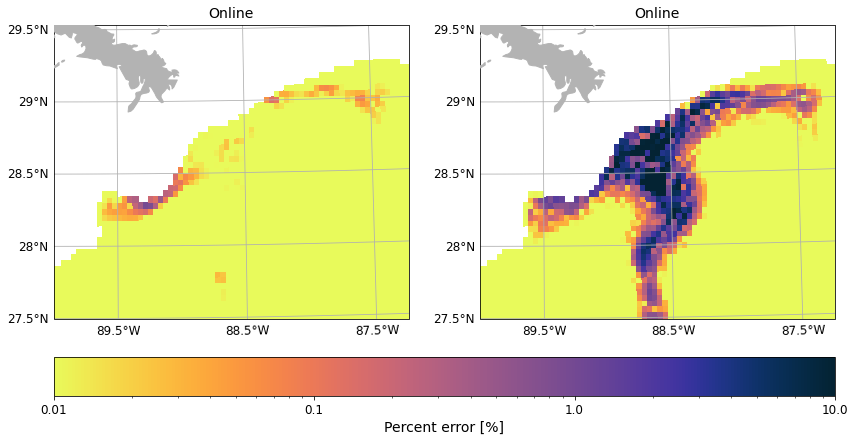

In [39]:

extent = [-90,-87.25,27.5,29.5]
xlocs = np.arange(-90.5,-86.5)
ylocs = np.arange(26,30, 0.5)

fig = plt.figure(figsize=(14,14))
nrows, ncols = 1, 2

## DYE AT 13.75 DAYS ##
ax1 = setmap(fig.add_subplot(nrows, ncols, 1, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = pererr100z.cf.plot(y='latitude', x='longitude', ax=ax1, cmap=cmo.thermal_r, transform=pc, 
                        add_colorbar=False, 
                        norm=LogNorm(vmin=0.01, vmax=10))#, vmin=0, vmax=dyemax)
plt.title('Online', fontsize=fsbig)

ax2 = setmap(fig.add_subplot(nrows, ncols, 2, projection=proj), xlocs=xlocs, ylocs=ylocs)
im = pererr1000z.cf.plot(y='latitude', x='longitude', ax=ax2, cmap=cmo.thermal_r, transform=pc, 
                                 add_colorbar=False, norm=LogNorm(vmin=0.01, vmax=10))#, vmin=0, vmax=dyemax)
plt.title('Online', fontsize=fsbig)

cb = fig.colorbar(im, ax=[ax1,ax2], orientation='horizontal', pad=0.05)#, aspect=30)
cb.set_label('Percent error [%]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)
cb.ax.set_xticklabels([0.01, 0.1, 1.0, 10.0])


### cross section

In [12]:

# calculate cross section of dye volume at end for all simulations
Dyecson = Dyeon.cf.isel(Y=iY).cf.sel(time=13.75)
Dyecson = Dyecson.compute()
Dyecsoff100 = Dyeoff100.cf.isel(Y=iY).cf.sel(time=13.75)
Dyecsoff1000 = Dyeoff1000.cf.isel(Y=iY).cf.sel(time=13.75)

Vcson = Von.cf.isel(Y=iY).cf.sel(time=13.75).compute()

# Calculate numerator for each offline simulation, by plotting section
numoff100 = abs(Dyecsoff100 - Dyecson)
numoff1000 = abs(Dyecsoff1000 - Dyecson)

# Calculate skill scores
pererr100 = (numoff100/(Vcson*dyemax))*100
pererr1000 = (numoff1000/(Vcson*dyemax))*100

pererr100 = pererr100.compute()
pererr1000 = pererr1000.compute()

<ipython-input-40-bbfed77949ff>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_xticklabels([0.01, 0.1, 1.0, 10.0])


[Text(0.01, 0, '0.01'),
 Text(0.1, 0, '0.1'),
 Text(1.0, 0, '1.0'),
 Text(10.0, 0, '10.0')]

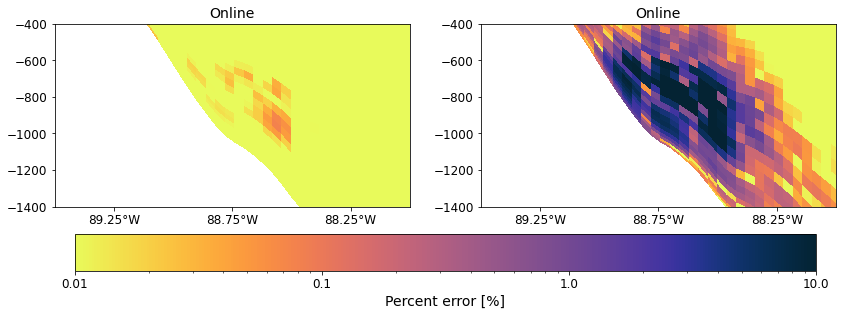

In [40]:

xlims = [-89.5,-88]
ylims = [-1400,-400]
xlocs = np.arange(-90.25,-87,0.5)

fig = plt.figure(figsize=(14,10))
nrows, ncols = 2, 2

## DYE AT 13.75 DAYS ##
ax1 = fig.add_subplot(nrows, ncols, 1)
ax = ax1
im = pererr100.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.thermal_r,
                           add_labels=False, norm=LogNorm(vmin=0.01, vmax=10), add_colorbar=False)#, vmax=10)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('Online', fontsize=fsbig)
formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)

ax2 = fig.add_subplot(nrows, ncols, 2)
ax = ax2
im = pererr1000.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.thermal_r,
                           add_labels=False, norm=LogNorm(vmin=0.01, vmax=10), add_colorbar=False)#, vmax=500)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.set_title('Online', fontsize=fsbig)
formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)

cb = fig.colorbar(im, ax=[ax1,ax2], orientation='horizontal', pad=0.11)#, aspect=30)
cb.set_label('Percent error [%]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)
cb.ax.set_xticklabels([0.01, 0.1, 1.0, 10.0])


## Combined Plots

### z slice

In [13]:
don = dyezon.cf.isel(Z=2).cf.sel(time=13.75)
doff100 = dyezoff100.cf.isel(Z=2).cf.sel(time=13.75)
doff1000 = dyezoff1000.cf.isel(Z=2).cf.sel(time=13.75)
diff1 = (don-doff100)
diff2 = (don-doff1000)

In [14]:
p1ax1 = dyezon.cf.isel(Z=2).cf.sel(time=13.75).compute()
p1ax2 = dyezoff100.cf.isel(Z=2).cf.sel(time=13.75).compute()
p1ax4 = dyezoff1000.cf.isel(Z=2).cf.sel(time=13.75).compute()
p1diff1 = diff1.compute()
p1diff2 = diff2.compute()

/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/scratch/user/kthyng/.conda/envs/XROMS/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning:

All at 13.75 days.

<ipython-input-86-82e5c3316c08>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([0.01, 0.1, 1.0, 10.0]);


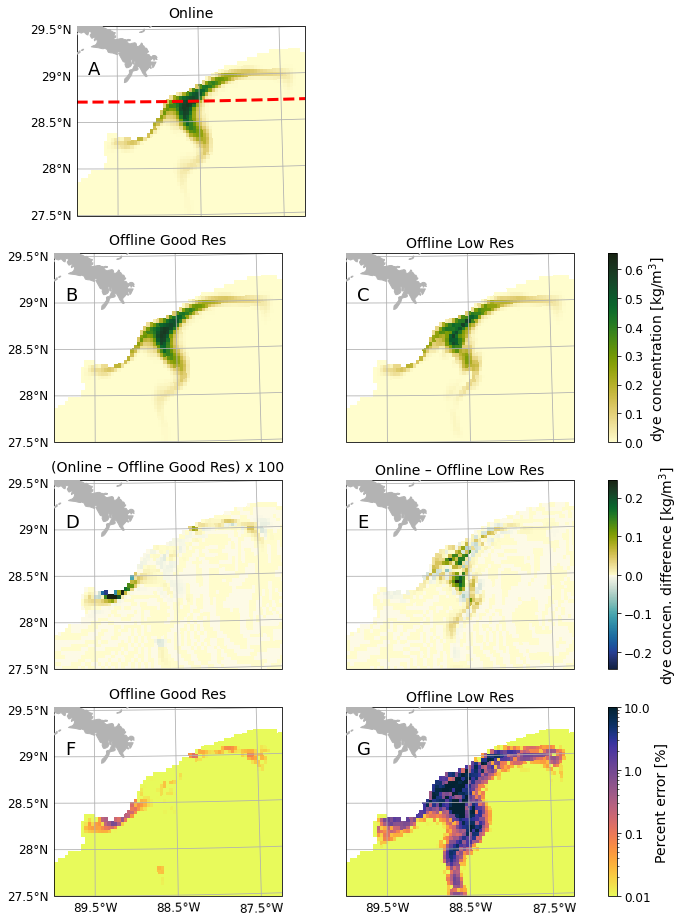

In [86]:
# diffmax = max(abs(diff1).max().values, abs(diff2).max().values)
# dyemax = dson.dye_01.cf.sel(time=13.75).max().values

extent = [-90,-87.25,27.5,29.5]
xlocs = np.arange(-90.5,-86.5)
ylocs = np.arange(26,30, 0.5)
letters = ['A','B','C','D','E','F','G']


fig = plt.figure(figsize=(12,16.0))#8.3, 11.7))
nrows, ncols = 4, 2

## DYE AT 13.75 DAYS ##
ax1 = setmap(fig.add_subplot(nrows, ncols, 1, projection=proj), xlocs=xlocs, ylocs=ylocs,
            bottom_labels=False)
im = p1ax1.cf.plot(y='latitude', x='longitude', ax=ax1, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False, vmin=0, vmax=dyemax)
ax1.plot(p1ax1.cf.isel(Y=iY).lon_rho, p1ax1.cf.isel(Y=iY).lat_rho, 'r', ls='--', lw=3, transform=pc)

ax1.set_title('Online', fontsize=fsbig)


ax2 = setmap(fig.add_subplot(nrows, ncols, 3, projection=proj), xlocs=xlocs, ylocs=ylocs, bottom_labels=False)
im = p1ax2.cf.plot(y='latitude', x='longitude', ax=ax2, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False, vmin=0, vmax=dyemax)
ax2.set_title('Offline Good Res', fontsize=fsbig)


ax4 = setmap(fig.add_subplot(nrows, ncols, 4, projection=proj), xlocs=xlocs, ylocs=ylocs, 
             left_labels=False, bottom_labels=False)
ax = ax4
im = p1ax4.cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.speed, transform=pc, 
                                 add_colorbar=False, vmin=0, vmax=dyemax)
ax.set_title('Offline Low Res', fontsize=fsbig)

cb = fig.colorbar(im, ax=[ax2,ax4], orientation='vertical')#, pad=0.02)#, aspect=40
cb.set_label('dye concentration [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


## DIFFERENCE IN DYE AT 13.75 DAYS ##
vmax = p1diff2.max()
ax5 = setmap(fig.add_subplot(nrows, ncols, 5, projection=proj), xlocs=xlocs, ylocs=ylocs, bottom_labels=False)
ax = ax5
im = (p1diff1*100).cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.delta, transform=pc, 
                                 add_colorbar=False, vmax=vmax)
ax.set_title('(Online – Offline Good Res) x 100', fontsize=fsbig)
# plt.title('good res - online', fontsize=fsbig)
# cb = fig.colorbar(im, ax=ax5, orientation='vertical')#, aspect=30)
# # cb.set_label('dye concentration difference [kg/m$^3$]', size=fsbig)
# cb.ax.tick_params(labelsize=fsmed)


ax6 = setmap(fig.add_subplot(nrows, ncols, 6, projection=proj), xlocs=xlocs, ylocs=ylocs, 
             left_labels=False, bottom_labels=False)
ax = ax6
im = p1diff2.cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.delta, transform=pc, 
                                 add_colorbar=False, vmax=vmax)
ax.set_title('Online – Offline Low Res', fontsize=fsbig)
cb = fig.colorbar(im, ax=[ax5,ax6], orientation='vertical')#, aspect=30)
cb.set_label('dye concen. difference [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


# percent error
ax7 = setmap(fig.add_subplot(nrows, ncols, 7, projection=proj), xlocs=xlocs, ylocs=ylocs)
ax = ax7
im = pererr100z.cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.thermal_r, transform=pc, 
                        add_colorbar=False, 
                        norm=LogNorm(vmin=0.01, vmax=10))#, vmin=0, vmax=dyemax)
ax.set_title('Offline Good Res', fontsize=fsbig)

ax8 = setmap(fig.add_subplot(nrows, ncols, 8, projection=proj), xlocs=xlocs, ylocs=ylocs, left_labels=False)
ax = ax8
im = pererr1000z.cf.plot(y='latitude', x='longitude', ax=ax, cmap=cmo.thermal_r, transform=pc, 
                                 add_colorbar=False, norm=LogNorm(vmin=0.01, vmax=10))#, vmin=0, vmax=dyemax)
ax.set_title('Offline Low Res', fontsize=fsbig)

cb = fig.colorbar(im, ax=[ax7,ax8], orientation='vertical', pad=0.05)#, aspect=30)
cb.set_label('Percent error [%]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)
cb.ax.set_yticklabels([0.01, 0.1, 1.0, 10.0]);


for i, ax in enumerate([ax1,ax2,ax4,ax5,ax6,ax7,ax8]):
    ax.text(0.05, 0.75, letters[i], transform=ax.transAxes, fontsize=18)


fig.savefig('figures/exp_zslice_low.png', bbox_inches='tight', dpi=100)
fig.savefig('figures/exp_zslice_high.png', bbox_inches='tight', dpi=300)

### Cross section

In [79]:
p2ax1 = dsson.dye_01.cf.isel(Y=iY).cf.sel(time=13.75).compute()
p2ax3 = dssoff100.dye_01.cf.isel(Y=iY).cf.sel(time=13.75).compute()
p2ax4 = dssoff1000.dye_01.cf.isel(Y=iY).cf.sel(time=13.75).compute()

p2diff1 = p2ax1 - p2ax3
p2diff2 = p2ax1 - p2ax4

In [80]:
xlims = [-89.5,-88]
ylims = [-1400,-400]
xlocs = np.arange(-90.25,-87,0.5)


<ipython-input-84-8c65e54bf2c5>:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([0.01, 0.1, 1.0, 10.0]);


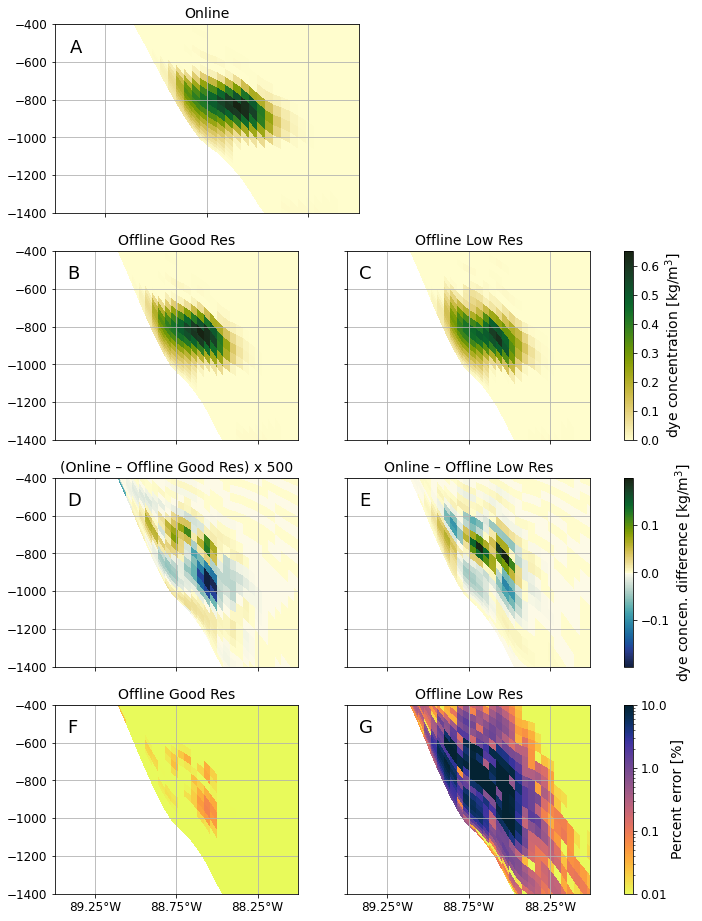

In [84]:
# diffmax = max(abs(diff1).max().values, abs(diff2).max().values)
# dyemax = dson.dye_01.cf.sel(time=13.75).max().values

# extent = [-90,-87.25,27.5,29.5]
# xlocs = np.arange(-90.5,-86.5)
# ylocs = np.arange(26,30, 0.5)

fig = plt.figure(figsize=(12,16.0))#8.3, 11.7))
nrows, ncols = 4, 2

## DYE AT 13.75 DAYS ##
ax1 = fig.add_subplot(nrows, ncols, 1)
ax = ax1
im = p2ax1.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed, 
                                 add_colorbar=False, vmin=0, vmax=dyemax, add_labels=False)
ax.set_title('Online', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_xticklabels('')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
# formatter = LongitudeFormatter()
# ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)


ax3 = fig.add_subplot(nrows, ncols, 3)
ax = ax3
im = p2ax3.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed, 
                                 add_colorbar=False, vmin=0, vmax=dyemax, add_labels=False)
ax.set_title('Offline Good Res', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_xticklabels('')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
# formatter = LongitudeFormatter()
# ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)


ax4 = fig.add_subplot(nrows, ncols, 4)
ax = ax4
im = p2ax4.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.speed, 
                                 add_colorbar=False, vmin=0, vmax=dyemax, add_labels=False)
ax.set_title('Offline Low Res', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
# formatter = LongitudeFormatter()
# ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)

cb = fig.colorbar(im, ax=[ax3,ax4], orientation='vertical')#, pad=0.02)#, aspect=40
cb.set_label('dye concentration [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


## DIFFERENCE IN DYE AT 13.75 DAYS ##
vmax = p2diff2.max()
ax5 = fig.add_subplot(nrows, ncols, 5)
ax = ax5
im = (p2diff1*500).cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.delta, 
                                 add_colorbar=False, add_labels=False, vmax=vmax)
ax.set_title('(Online – Offline Good Res) x 500', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_xticklabels('')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
# formatter = LongitudeFormatter()
# ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)
# plt.title('good res - online', fontsize=fsbig)
# cb = fig.colorbar(im, ax=ax5, orientation='vertical')#, aspect=30)
# # cb.set_label('dye concentration difference [kg/m$^3$]', size=fsbig)
# cb.ax.tick_params(labelsize=fsmed)


ax6 = fig.add_subplot(nrows, ncols, 6)
ax = ax6
im = p2diff2.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.delta, 
                                 add_colorbar=False, add_labels=False, vmax=vmax)
ax.set_title('Online – Offline Low Res', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
# formatter = LongitudeFormatter()
# ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)
cb = fig.colorbar(im, ax=[ax5,ax6], orientation='vertical')#, aspect=30)
cb.set_label('dye concen. difference [kg/m$^3$]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)


# percent error
ax7 = fig.add_subplot(nrows, ncols, 7)
ax = ax7
im = pererr100.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.thermal_r, 
                        add_colorbar=False, 
                        norm=LogNorm(vmin=0.01, vmax=10), add_labels=False)#, vmin=0, vmax=dyemax)
ax.set_title('Offline Good Res', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)

ax8 = fig.add_subplot(nrows, ncols, 8)
ax = ax8
im = pererr1000.cf.plot(y='z_rho0', x='longitude', ax=ax, cmap=cmo.thermal_r, 
                                 add_colorbar=False, norm=LogNorm(vmin=0.01, vmax=10), add_labels=False)#, vmin=0, vmax=dyemax)
ax.set_title('Offline Low Res', fontsize=fsbig)
ax.set_xticks(xlocs)
ax.set_yticklabels('')
ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='both', which='both', labelsize=fsmed)
ax.grid(True)

cb = fig.colorbar(im, ax=[ax7,ax8], orientation='vertical', pad=0.05)#, aspect=30)
cb.set_label('Percent error [%]', size=fsbig)
cb.ax.tick_params(labelsize=fsmed)
cb.ax.set_yticklabels([0.01, 0.1, 1.0, 10.0]);

for i, ax in enumerate([ax1,ax3,ax4,ax5,ax6,ax7,ax8]):
    ax.text(0.05, 0.85, letters[i], transform=ax.transAxes, fontsize=18)

fig.savefig('figures/exp_cs_low.png', bbox_inches='tight', dpi=100)
fig.savefig('figures/exp_cs_high.png', bbox_inches='tight', dpi=300)

# Skill scores

Recreate the skill scores from the previous analysis but for this experiment.

In [18]:
# Calculate denominator, which is the same for skill scores
denom = np.sqrt((Dyeon**2).cf.mean(('Z','Y','X')))

In [19]:
numoff100 = np.sqrt(((Dyeoff100 - Dyeon)**2).cf.mean(('Z','Y','X')))
numoff1000 = np.sqrt(((Dyeoff1000 - Dyeon)**2).cf.mean(('Z','Y','X')))

# Calculate skill scores
skilloff100 = (1-numoff100/denom)*100
skilloff1000 = (1-numoff1000/denom)*100


In [20]:
skilloff100 = skilloff100.compute()
skilloff1000 = skilloff1000.compute()

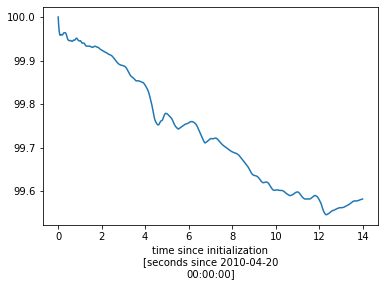

In [21]:
skilloff100.plot()


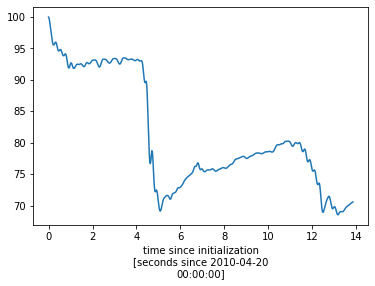

In [22]:
skilloff1000.plot()